## Table of Contents <a id="toc">

* [Updated Script](#new_daily)
* [Save](#save)

## Initial Imports

In [1]:
import pandas as pd
import pickle
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('poster')
%matplotlib inline

In [2]:
pwd

'/home/matt/Documents/Projects/WebDev/CoronaVirus/JHU-COVID-19-Processing/EDA_DEV_Notebooks'

##  Archived COVID-19 DATASET (Contains Complete Data Through March 22nd)

In [3]:
ls COVID-19/archived_data/archived_time_series/

ls: cannot access 'COVID-19/archived_data/archived_time_series/': No such file or directory


In [4]:
pwd

'/home/matt/Documents/Projects/WebDev/CoronaVirus/JHU-COVID-19-Processing/EDA_DEV_Notebooks'

## Updated Process Mar 26th <a id ="new_daily">
    
[Table Of Contents](#toc)

### Date Notes

Found an error to French Polynesia Data on March 23rd:  
https://github.com/CSSEGISandData/COVID-19/issues/1818

## Import State Lat Long Dicts <a id="latLongDicts">

[Table of Contents](#toc)

In [7]:
import sys
sys.platform

'linux'

In [10]:
pwd

'/home/matt/Documents/Projects/WebDev/CoronaVirus/JHU-COVID-19-Processing/EDA_DEV_Notebooks'

In [13]:
#Lat
mac_path = '../states_lat_dict.pkl'

pkl_file = open('../states_lat_dict.pkl', 'rb')
states_lat_dict = pickle.load(pkl_file)
pkl_file.close()

#Long
pkl_file = open('../states_long_dict.pkl', 'rb')
states_long_dict = pickle.load(pkl_file)
pkl_file.close()


#Test
state = 'Alabama'
print(states_lat_dict[state] , states_long_dict[state])

32.3182 -86.9023


In [23]:
d1 = date(2020, 1, 22)  # start date
y, m, d = [int(x) for x in datetime.now().strftime('%Y-%m-%d').split('-')]
d2 = date(2020, 3, 22)  # end date
delta = d2 - d1         # timedelta

dates = []

for i in range(delta.days):
    d = d1 + timedelta(i)
    dates.append(d.strftime('%-m/%-d/%y'))
print(dates)

['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20']


In [21]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [22]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')

In [88]:
#Import Baseline File
if sys.platform == 'mac':
    jhuBaseDir = '/Users/matthewmitchell/Documents/COVID-19/'
elif sys.platform == 'linux':
    jhuBaseDir = '/home/matt/Documents/Projects/WebDev/CoronaVirus/COVID-19/'
df = pd.read_csv(jhuBaseDir+'archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv')

dfs = [] #Make a list of dfs
#Iterate through desired date columns and create df
# dates = ['1/22/20','1/26/20', '2/2/20', '2/9/20', '2/16/20', '2/23/20',
#          '3/1/20','3/5/20','3/8/20','3/12/20', '3/16/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20',
#          '3/22/20']
d1 = date(2020, 1, 22)  # start date
y, m, d = [int(x) for x in datetime.now().strftime('%Y-%m-%d').split('-')]
d2 = date(2020, 3, 22)  # end date
delta = d2 - d1         # timedelta

dates = []

for i in range(delta.days):
    d = d1 + timedelta(i)
    dates.append(d.strftime('%-m/%-d/%y'))
    
standard_cols = ['Province/State', 'Country/Region', 'Lat', 'Long']
for col in dates:
    temp = df[standard_cols+[col]]
    temp.columns = ['Province/State', 'Country/Region', 'Lat', 'Long', 'ConfirmedCases']
    temp['Date'] = col
    #Append df
    dfs.append(temp)
#Concat Dataframes
transformed = pd.concat(dfs, ignore_index=True)
print(len(transformed))
transformed.Date = pd.to_datetime(transformed.Date)
transformed.Date = transformed.Date.dt.strftime('%Y-%m-%d')

daily_dir = jhuBaseDir + 'csse_covid_19_data/csse_covid_19_daily_reports/'
# dates = ['03-{}-2020'.format(i) for i in range(23,31)]

d1 = date(2020, 3, 23)  # start date
y, m, d = [int(x) for x in datetime.now().strftime('%Y-%m-%d').split('-')]
d2 = date(y, m, d)  # end date
delta = d2 - d1         # timedelta

dates = []

for i in range(delta.days):
    d = d1 + timedelta(i)
    dates.append(d.strftime('%m-%d-%Y'))

files = [date+'.csv' for date in dates]
# dfs = []
for i, file in enumerate(files):
    daily = pd.read_csv(daily_dir+file)
    columns = ['Province_State', 'Country_Region', 'Last_Update', 'Combined_Key',
               'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active'
              ]
    daily = daily.rename({'Province_State':'Province/State',
                         'Country_Region':'Country/Region',
                         'Confirmed':'ConfirmedCases',
                         'Long_':'Long'}, axis=1)
    numericalCols = ['ConfirmedCases', 'Deaths', 'Recovered', 'Active']

    us = daily[daily['Country/Region']=='US']
    us = us.groupby(['Province/State', 'Country/Region'])['ConfirmedCases'].sum().reset_index()
    us['Lat'] = us['Province/State'].map(states_lat_dict)
    us['Long'] = us['Province/State'].map(states_long_dict)
    other = daily[daily['Country/Region']!='US']
    daily = pd.concat([other, us])
    daily['Date'] = dates[i]
    daily['Date'] = pd.to_datetime(daily['Date'])
    daily['Date'] = daily['Date'].dt.strftime('%Y-%m-%d')
   
#     daily = daily[transformed.columns]
    print('Current Length:', len(transformed))
    print('Adding {} rows. Next length should read: {}'.format(len(daily), len(transformed)+len(daily)))
    transformed = transformed.append(daily, ignore_index=True)

idx_to_update = transformed[(transformed['Province/State']=='French Polynesia')
           & (transformed['Date']=='2020-03-23')].index[0]
transformed.iat[idx_to_update, 4] = 25

print(len(transformed))
print(transformed.Date.value_counts())

/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


30060


/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/matt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Current Length: 30060
Adding 294 rows. Next length should read: 30354
Current Length: 30354
Adding 298 rows. Next length should read: 30652
Current Length: 30652
Adding 302 rows. Next length should read: 30954
Current Length: 30954
Adding 306 rows. Next length should read: 31260
Current Length: 31260
Adding 307 rows. Next length should read: 31567
Current Length: 31567
Adding 311 rows. Next length should read: 31878
Current Length: 31878
Adding 311 rows. Next length should read: 32189
Current Length: 32189
Adding 312 rows. Next length should read: 32501
Current Length: 32501
Adding 313 rows. Next length should read: 32814
Current Length: 32814
Adding 313 rows. Next length should read: 33127
Current Length: 33127
Adding 315 rows. Next length should read: 33442
Current Length: 33442
Adding 315 rows. Next length should read: 33757
Current Length: 33757
Adding 316 rows. Next length should read: 34073
Current Length: 34073
Adding 319 rows. Next length should read: 34392
Current Length: 3439

FileNotFoundError: [Errno 2] File b'/home/matt/Documents/Projects/WebDev/CoronaVirus/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-06-2020.csv' does not exist: b'/home/matt/Documents/Projects/WebDev/CoronaVirus/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-06-2020.csv'

In [124]:
usCounties = []
for i, file in enumerate(files):
    daily = pd.read_csv(daily_dir+file)
    columns = ['Province_State', 'Country_Region', 'Last_Update', 'Combined_Key',
               'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active'
              ]
    daily = daily.rename({'Province_State':'Province/State',
                         'Country_Region':'Country/Region',
                         'Confirmed':'ConfirmedCases',
                         'Long_':'Long'}, axis=1)
    numericalCols = ['ConfirmedCases', 'Deaths', 'Recovered', 'Active']

    us = daily[daily['Country/Region']=='US']
    us = us[~us.Admin2.isna()]
    us['Date'] = dates[i]
    usCounties.append(us)
usCounties = pd.concat(usCounties, ignore_index=True)

In [125]:
locCols = ['Admin2','Province/State', 'Country/Region', 'Lat', 'Long', 'Combined_Key']
cols = ['Admin2', 'Province/State', 'Country/Region',
       'Lat', 'Long', 'ConfirmedCases', 'Combined_Key', 'Date']
usCounties = usCounties[cols]
usCounties['Date'] = pd.to_datetime(usCounties['Date'])
usCountes = usCounties.sort_values(by='Date')
usCounties['NewCases'] = usCounties.groupby(locCols)['ConfirmedCases'].diff()
usCounties.head()

,Admin2,Province/State,Country/Region,Lat,Long,ConfirmedCases,Combined_Key,Date,NewCases
0,Abbeville,South Carolina,US,34.223334,-82.461707,1,"Abbeville, South Carolina, US",2020-03-23,NaN
1,Acadia,Louisiana,US,30.295065,-92.414197,1,"Acadia, Louisiana, US",2020-03-23,NaN
2,Accomack,Virginia,US,37.767072,-75.632346,1,"Accomack, Virginia, US",2020-03-23,NaN
3,Ada,Idaho,US,43.452658,-116.241552,13,"Ada, Idaho, US",2020-03-23,NaN
4,Adair,Iowa,US,41.330756,-94.471059,1,"Adair, Iowa, US",2020-03-23,NaN


In [127]:
usCounties['NewCases'] = usCounties['NewCases'].fillna(0)

In [128]:
usCounties['PercentIncrease'] = usCounties['NewCases'] / usCounties['ConfirmedCases']

In [132]:
y, m, d = [int(x) for x in datetime.now().strftime('%Y-%m-%d').split('-')]
d2 = date(y, m, d)  # end date (Today)
delta = d2 - d1         # timedelta
weekago = d2 - timedelta(weeks=1)

In [148]:
pastWeek = usCounties[(usCounties.Date >= weekago)
                      & (usCounties.ConfirmedCases>1000)]
pastWeek = pastWeek.groupby('Combined_Key').agg({'ConfirmedCases':max,'NewCases':sum})
pastWeek['PercentIncrease'] = pastWeek['NewCases'] / pastWeek['ConfirmedCases']
pastWeek.sort_values(by='NewCases').tail(30)

/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


,ConfirmedCases,NewCases,PercentIncrease
Combined_Key,,,
"Lake, Illinois, US",4529,1147.0,0.253257
"Providence, Rhode Island, US",7138,1171.0,0.164052
"DuPage, Illinois, US",4056,1186.0,0.292406
"New Haven, Connecticut, US",8419,1214.0,0.144198
"Union, New Jersey, US",13604,1224.0,0.089974
"Trousdale, Tennessee, US",1355,1232.0,0.909225
"District of Columbia, District of Columbia, US",5461,1355.0,0.248123
"Fairfax, Virginia, US",4834,1386.0,0.286719
"Maricopa, Arizona, US",5138,1415.0,0.275399


In [167]:
hotSpots = pastWeek.sort_values(by='PercentIncrease').tail(9).index
','.join(hotSpots[0].split(',')[:2])

'Prince William, Virginia'

In [175]:
usCounties.Date.iloc[0]

Timestamp('2020-03-23 00:00:00')

In [189]:
sns.reset_orig()

/home/matt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/matt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


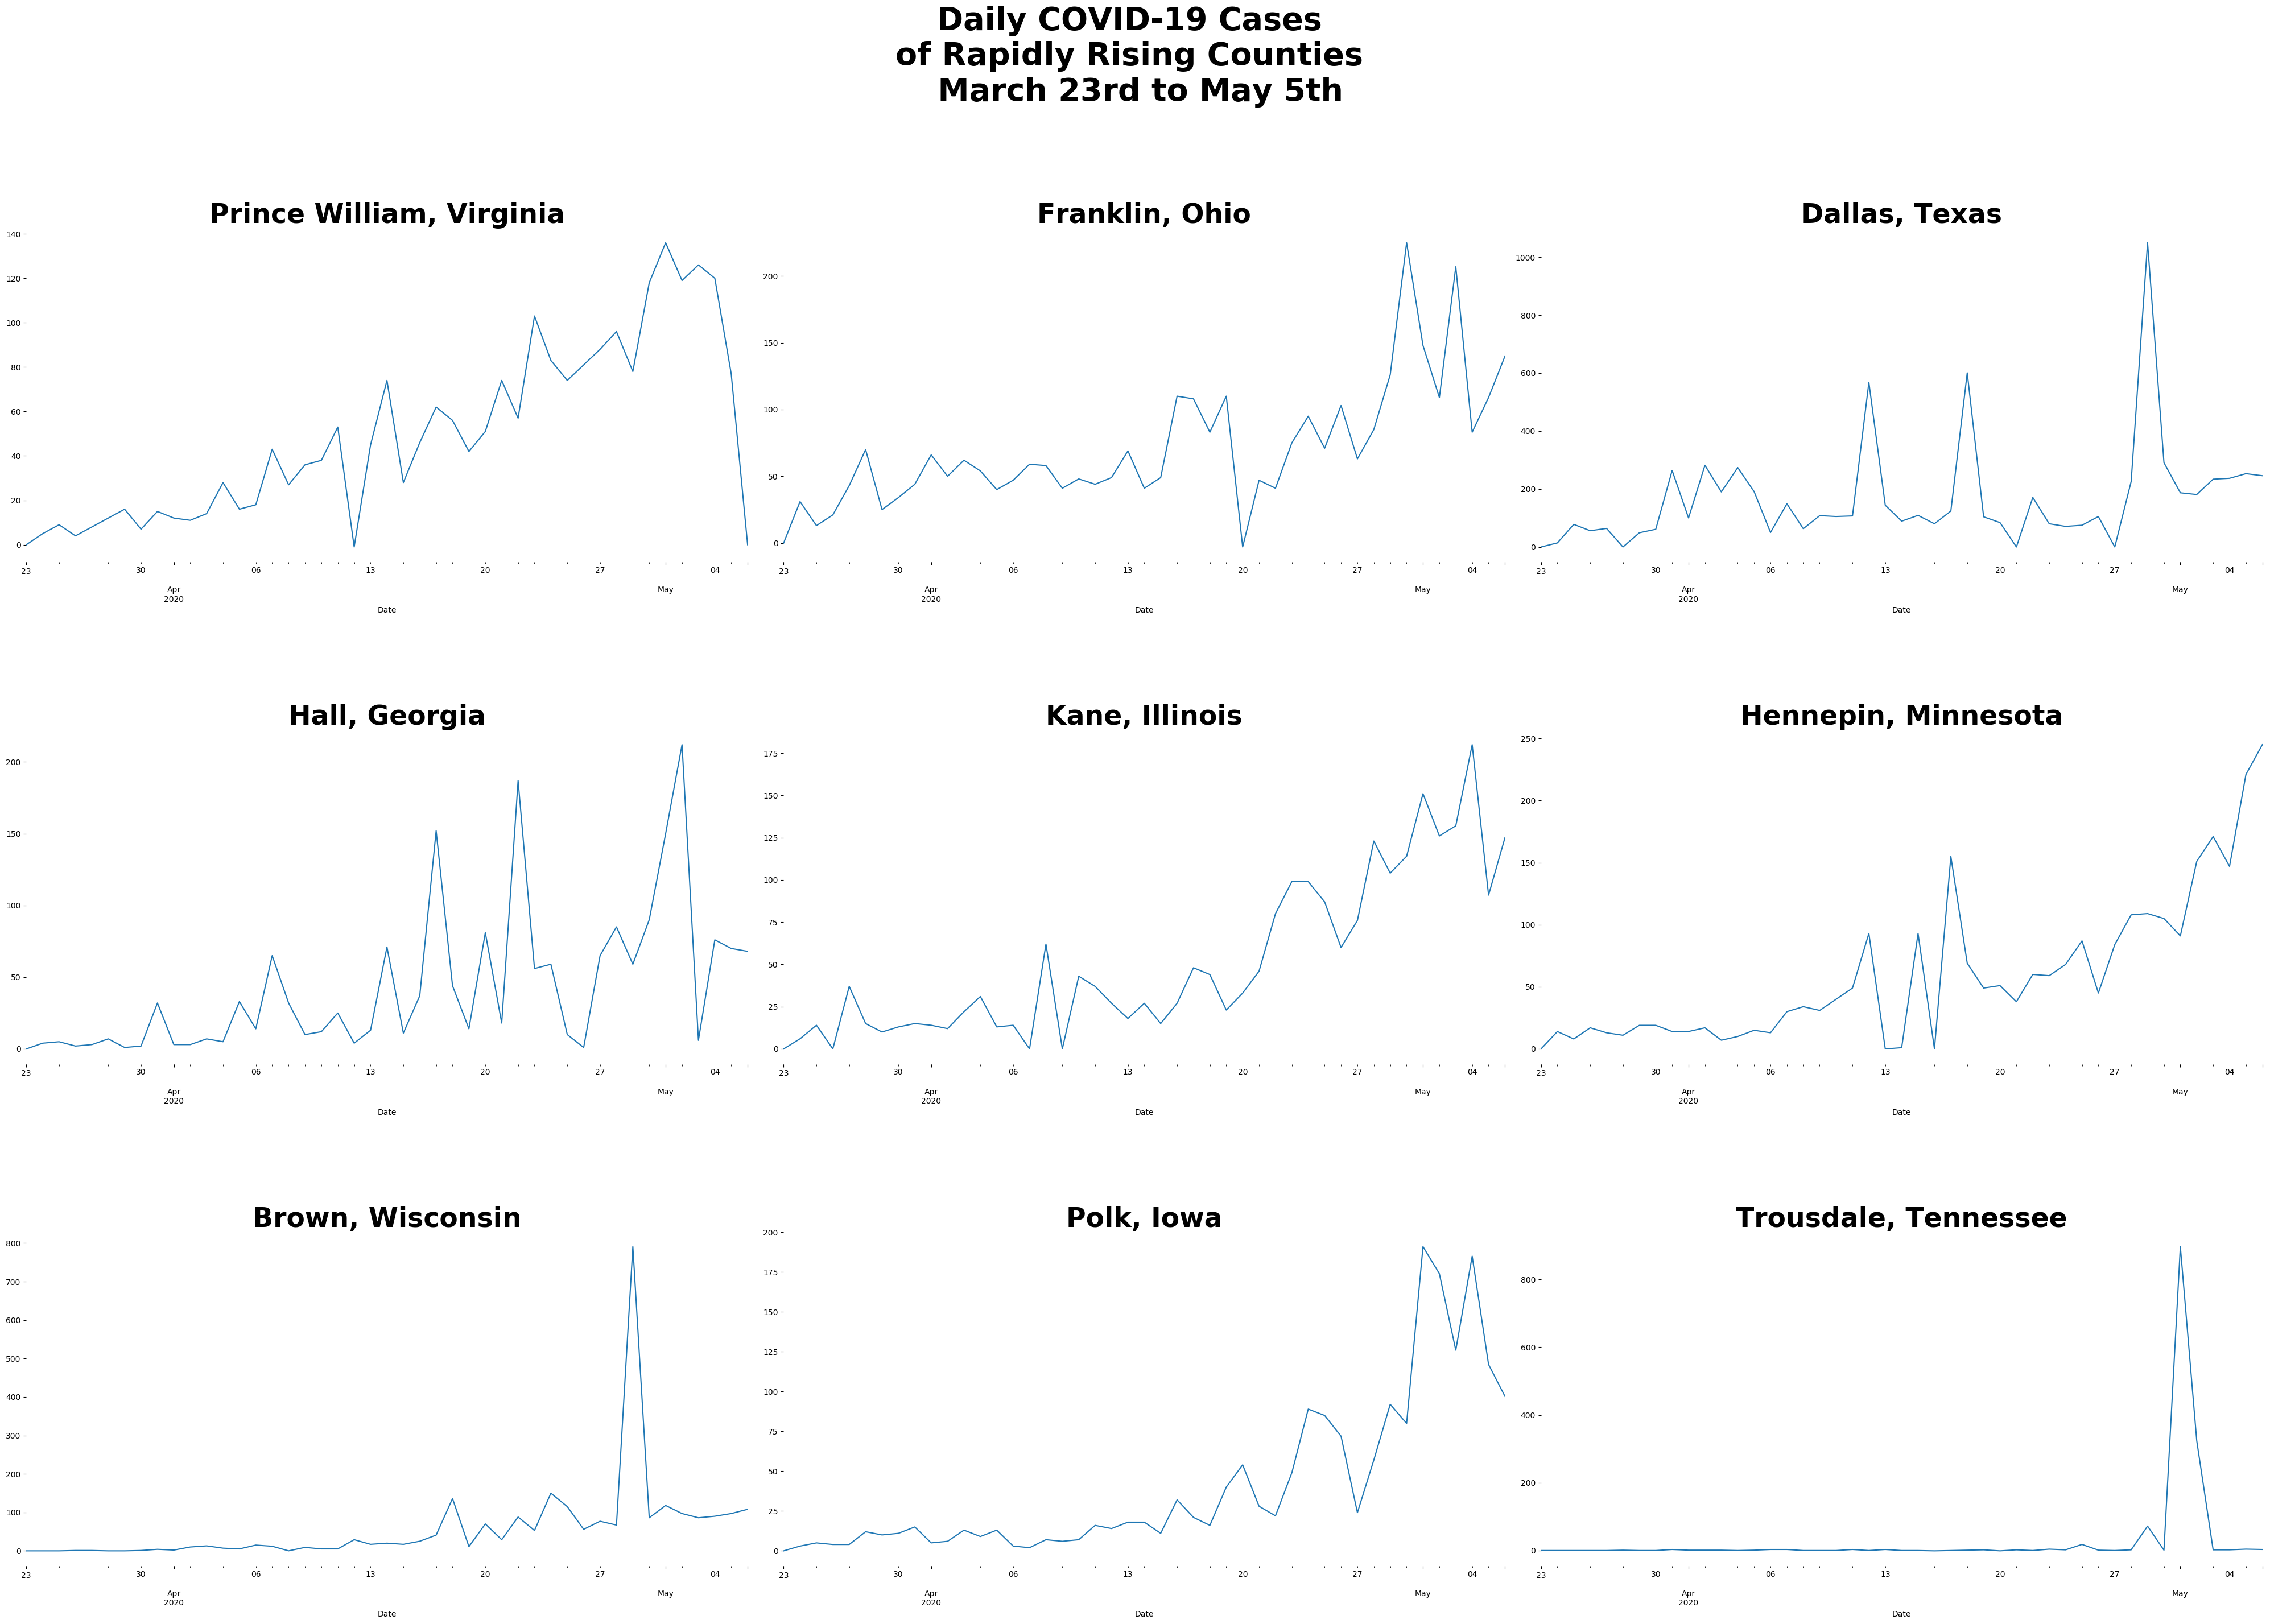

In [196]:
nrows = 3
ncols = 3
lastRow = nrows - 1
toRemove = nrows*ncols - len(states)
fig, axes = plt.subplots(nrows, ncols, figsize=(40,30))
for n, county in enumerate(hotSpots):
    i = n // ncols
    j = n % ncols
    ax = axes[i,j]
    name = ','.join(county.split(',')[:2])
    ax.set_title(name, fontsize=34, weight='bold')
#     ax.set_axis_off()
#     ax.axis('off') #No axis
    #Y-axis only
#     ax.set_xticks([usCounties.Date.min(), usCounties.Date.max()])
    myFmt = mdates.DateFormatter('%b')
    ax.xaxis.set_major_formatter(myFmt)
#     ax.get_xaxis().set_ticks(None)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
#     ax.tick_params(axis='x', labelrotation=-45)
    temp = usCounties[usCounties['Combined_Key']==county]
    temp = temp.set_index('Date')
    temp['NewCases'].plot(ax=ax)

for i in range(ncols-toRemove,ncols):
    fig.delaxes(axes[lastRow,i])
fig.suptitle("Daily COVID-19 Cases \nof Rapidly Rising Counties \n March 23rd to May 5th", fontsize=40, y=.95, weight='bold');
plt.tight_layout();
plt.subplots_adjust(top=0.82, hspace=.5)
# plt.savefig('StateDailyCasesWithYaxis.png', facecolor='white')
plt.show()

In [130]:
usCounties.sort_values(by='PercentIncrease').head(10)

,Admin2,Province/State,Country/Region,Lat,Long,ConfirmedCases,Combined_Key,Date,NewCases,PercentIncrease
22352,Beaver,Utah,US,38.356571,-113.234223,0,"Beaver, Utah, US",2020-03-30,-1.0,-inf
6202,Weakley,Tennessee,US,36.298962,-88.719909,0,"Weakley, Tennessee, US",2020-03-24,-1.0,-inf
63488,Boundary,Idaho,US,48.766848,-116.463018,0,"Boundary, Idaho, US",2020-04-15,-1.0,-inf
6843,Chowan,North Carolina,US,36.129081,-76.601184,0,"Chowan, North Carolina, US",2020-03-25,-1.0,-inf
99340,San Juan,Colorado,US,37.762490,-107.676329,0,"San Juan, Colorado, US",2020-04-27,-1.0,-inf
14222,LaSalle,Illinois,US,41.344261,-88.886339,0,"LaSalle, Illinois, US",2020-03-27,-3.0,-inf
23521,Hyde,North Carolina,US,35.420177,-76.151805,0,"Hyde, North Carolina, US",2020-03-30,-1.0,-inf
23207,Garfield,Utah,US,37.854472,-111.441876,0,"Garfield, Utah, US",2020-03-30,-1.0,-inf
21875,Unassigned,California,US,0.000000,0.000000,0,"Unassigned, California, US",2020-03-29,-12.0,-inf
23194,Gage,Nebraska,US,40.261868,-96.689467,0,"Gage, Nebraska, US",2020-03-30,-1.0,-inf


In [105]:
daily[~(daily.Admin2.isna())]

,Active,Admin2,Combined_Key,ConfirmedCases,Country/Region,Deaths,FIPS,Last_Update,Lat,Long,Province/State,Recovered,Date


In [90]:
transformed[transformed['Country/Region']=='US'].head()

,Active,Admin2,Combined_Key,ConfirmedCases,Country/Region,Date,Deaths,FIPS,Last_Update,Lat,Long,Province/State,Recovered
98,NaN,NaN,NaN,0,US,2020-01-22,NaN,NaN,NaN,47.4009,-121.4905,Washington,NaN
99,NaN,NaN,NaN,0,US,2020-01-22,NaN,NaN,NaN,42.1657,-74.9481,New York,NaN
100,NaN,NaN,NaN,0,US,2020-01-22,NaN,NaN,NaN,36.1162,-119.6816,California,NaN
101,NaN,NaN,NaN,0,US,2020-01-22,NaN,NaN,NaN,42.2302,-71.5301,Massachusetts,NaN
102,NaN,NaN,NaN,0,US,2020-01-22,NaN,NaN,NaN,35.4437,139.6380,Diamond Princess,NaN


## Data Checks <a id="dataChecks">
[Table of Contents](#toc)

In [25]:
transformed.head()

,Province/State,Country/Region,Lat,Long,ConfirmedCases,Date
0,NaN,Thailand,15.0000,101.0000,2,2020-01-22
1,NaN,Japan,36.0000,138.0000,2,2020-01-22
2,NaN,Singapore,1.2833,103.8333,0,2020-01-22
3,NaN,Nepal,28.1667,84.2500,0,2020-01-22
4,NaN,Malaysia,2.5000,112.5000,0,2020-01-22


In [94]:
locCols = ['Admin2','Province/State', 'Country/Region', 'Lat', 'Long']
transformed.head()
transformed['NewCases'] = transformed.groupby(locCols)['ConfirmedCases'].diff()

In [95]:
transformed.head()

,Active,Admin2,Combined_Key,ConfirmedCases,Country/Region,Date,Deaths,FIPS,Last_Update,Lat,Long,Province/State,Recovered,NewCases
0,NaN,NaN,NaN,2,Thailand,2020-01-22,NaN,NaN,NaN,15.0000,101.0000,NaN,NaN,NaN
1,NaN,NaN,NaN,2,Japan,2020-01-22,NaN,NaN,NaN,36.0000,138.0000,NaN,NaN,NaN
2,NaN,NaN,NaN,0,Singapore,2020-01-22,NaN,NaN,NaN,1.2833,103.8333,NaN,NaN,NaN
3,NaN,NaN,NaN,0,Nepal,2020-01-22,NaN,NaN,NaN,28.1667,84.2500,NaN,NaN,NaN
4,NaN,NaN,NaN,0,Malaysia,2020-01-22,NaN,NaN,NaN,2.5000,112.5000,NaN,NaN,NaN


In [103]:
transformed[(transformed['Country/Region']=='US')
           & (~transformed['Admin2'].isna())].sort_values(by='ConfirmedCases', ascending=False)

,Active,Admin2,Combined_Key,ConfirmedCases,Country/Region,Date,Deaths,FIPS,Last_Update,Lat,Long,Province/State,Recovered,NewCases


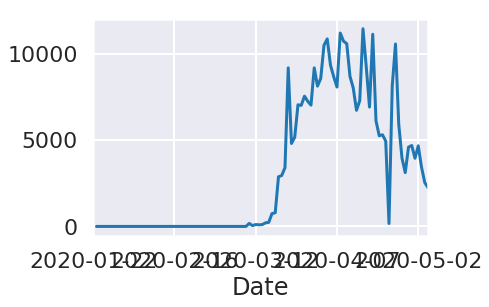

In [27]:
temp = transformed[transformed['Province/State']=='New York']
temp = temp.set_index('Date')
temp['NewCases'].plot()

In [38]:
temp.head()

,Province/State,Country/Region,Lat,Long,ConfirmedCases,NewCases
Date,,,,,,
2020-01-22,Alaska,US,61.3707,-152.4044,0,NaN
2020-01-23,Alaska,US,61.3707,-152.4044,0,0.0
2020-01-24,Alaska,US,61.3707,-152.4044,0,0.0
2020-01-25,Alaska,US,61.3707,-152.4044,0,0.0
2020-01-26,Alaska,US,61.3707,-152.4044,0,0.0


In [39]:
temp.tail()

,Province/State,Country/Region,Lat,Long,ConfirmedCases,NewCases
Date,,,,,,
2020-05-01,Alaska,US,61.3707,-152.4044,364,9.0
2020-05-02,Alaska,US,61.3707,-152.4044,365,1.0
2020-05-03,Alaska,US,61.3707,-152.4044,368,3.0
2020-05-04,Alaska,US,61.3707,-152.4044,370,2.0
2020-05-05,Alaska,US,61.3707,-152.4044,371,1.0


In [35]:
temp.iloc[50:75]

,Province/State,Country/Region,Lat,Long,ConfirmedCases,NewCases
Date,,,,,,
2020-03-12,New York,US,42.1657,-74.9481,328,108.0
2020-03-13,New York,US,42.1657,-74.9481,421,93.0
2020-03-14,New York,US,42.1657,-74.9481,525,104.0
2020-03-15,New York,US,42.1657,-74.9481,732,207.0
2020-03-16,New York,US,42.1657,-74.9481,967,235.0
2020-03-17,New York,US,42.1657,-74.9481,1706,739.0
2020-03-18,New York,US,42.1657,-74.9481,2495,789.0
2020-03-19,New York,US,42.1657,-74.9481,5365,2870.0
2020-03-20,New York,US,42.1657,-74.9481,8310,2945.0


In [36]:
states = ['Washington', 'New York', 'California', 'Massachusetts',
        'Georgia', 'Colorado',
       'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Hawaii', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming', 'Alabama']
#Reorder by total number of Confirmed Cases
states = transformed[transformed['Province/State'].isin(states)].groupby('Province/State')['ConfirmedCases'].max().sort_values(ascending=False).index

In [40]:
ax.axis()

In [70]:
transformed.Date = pd.to_datetime(transformed.Date)

In [72]:
import matplotlib.dates as mdates

In [74]:
transformed.Date.min()

Timestamp('2020-01-22 00:00:00')

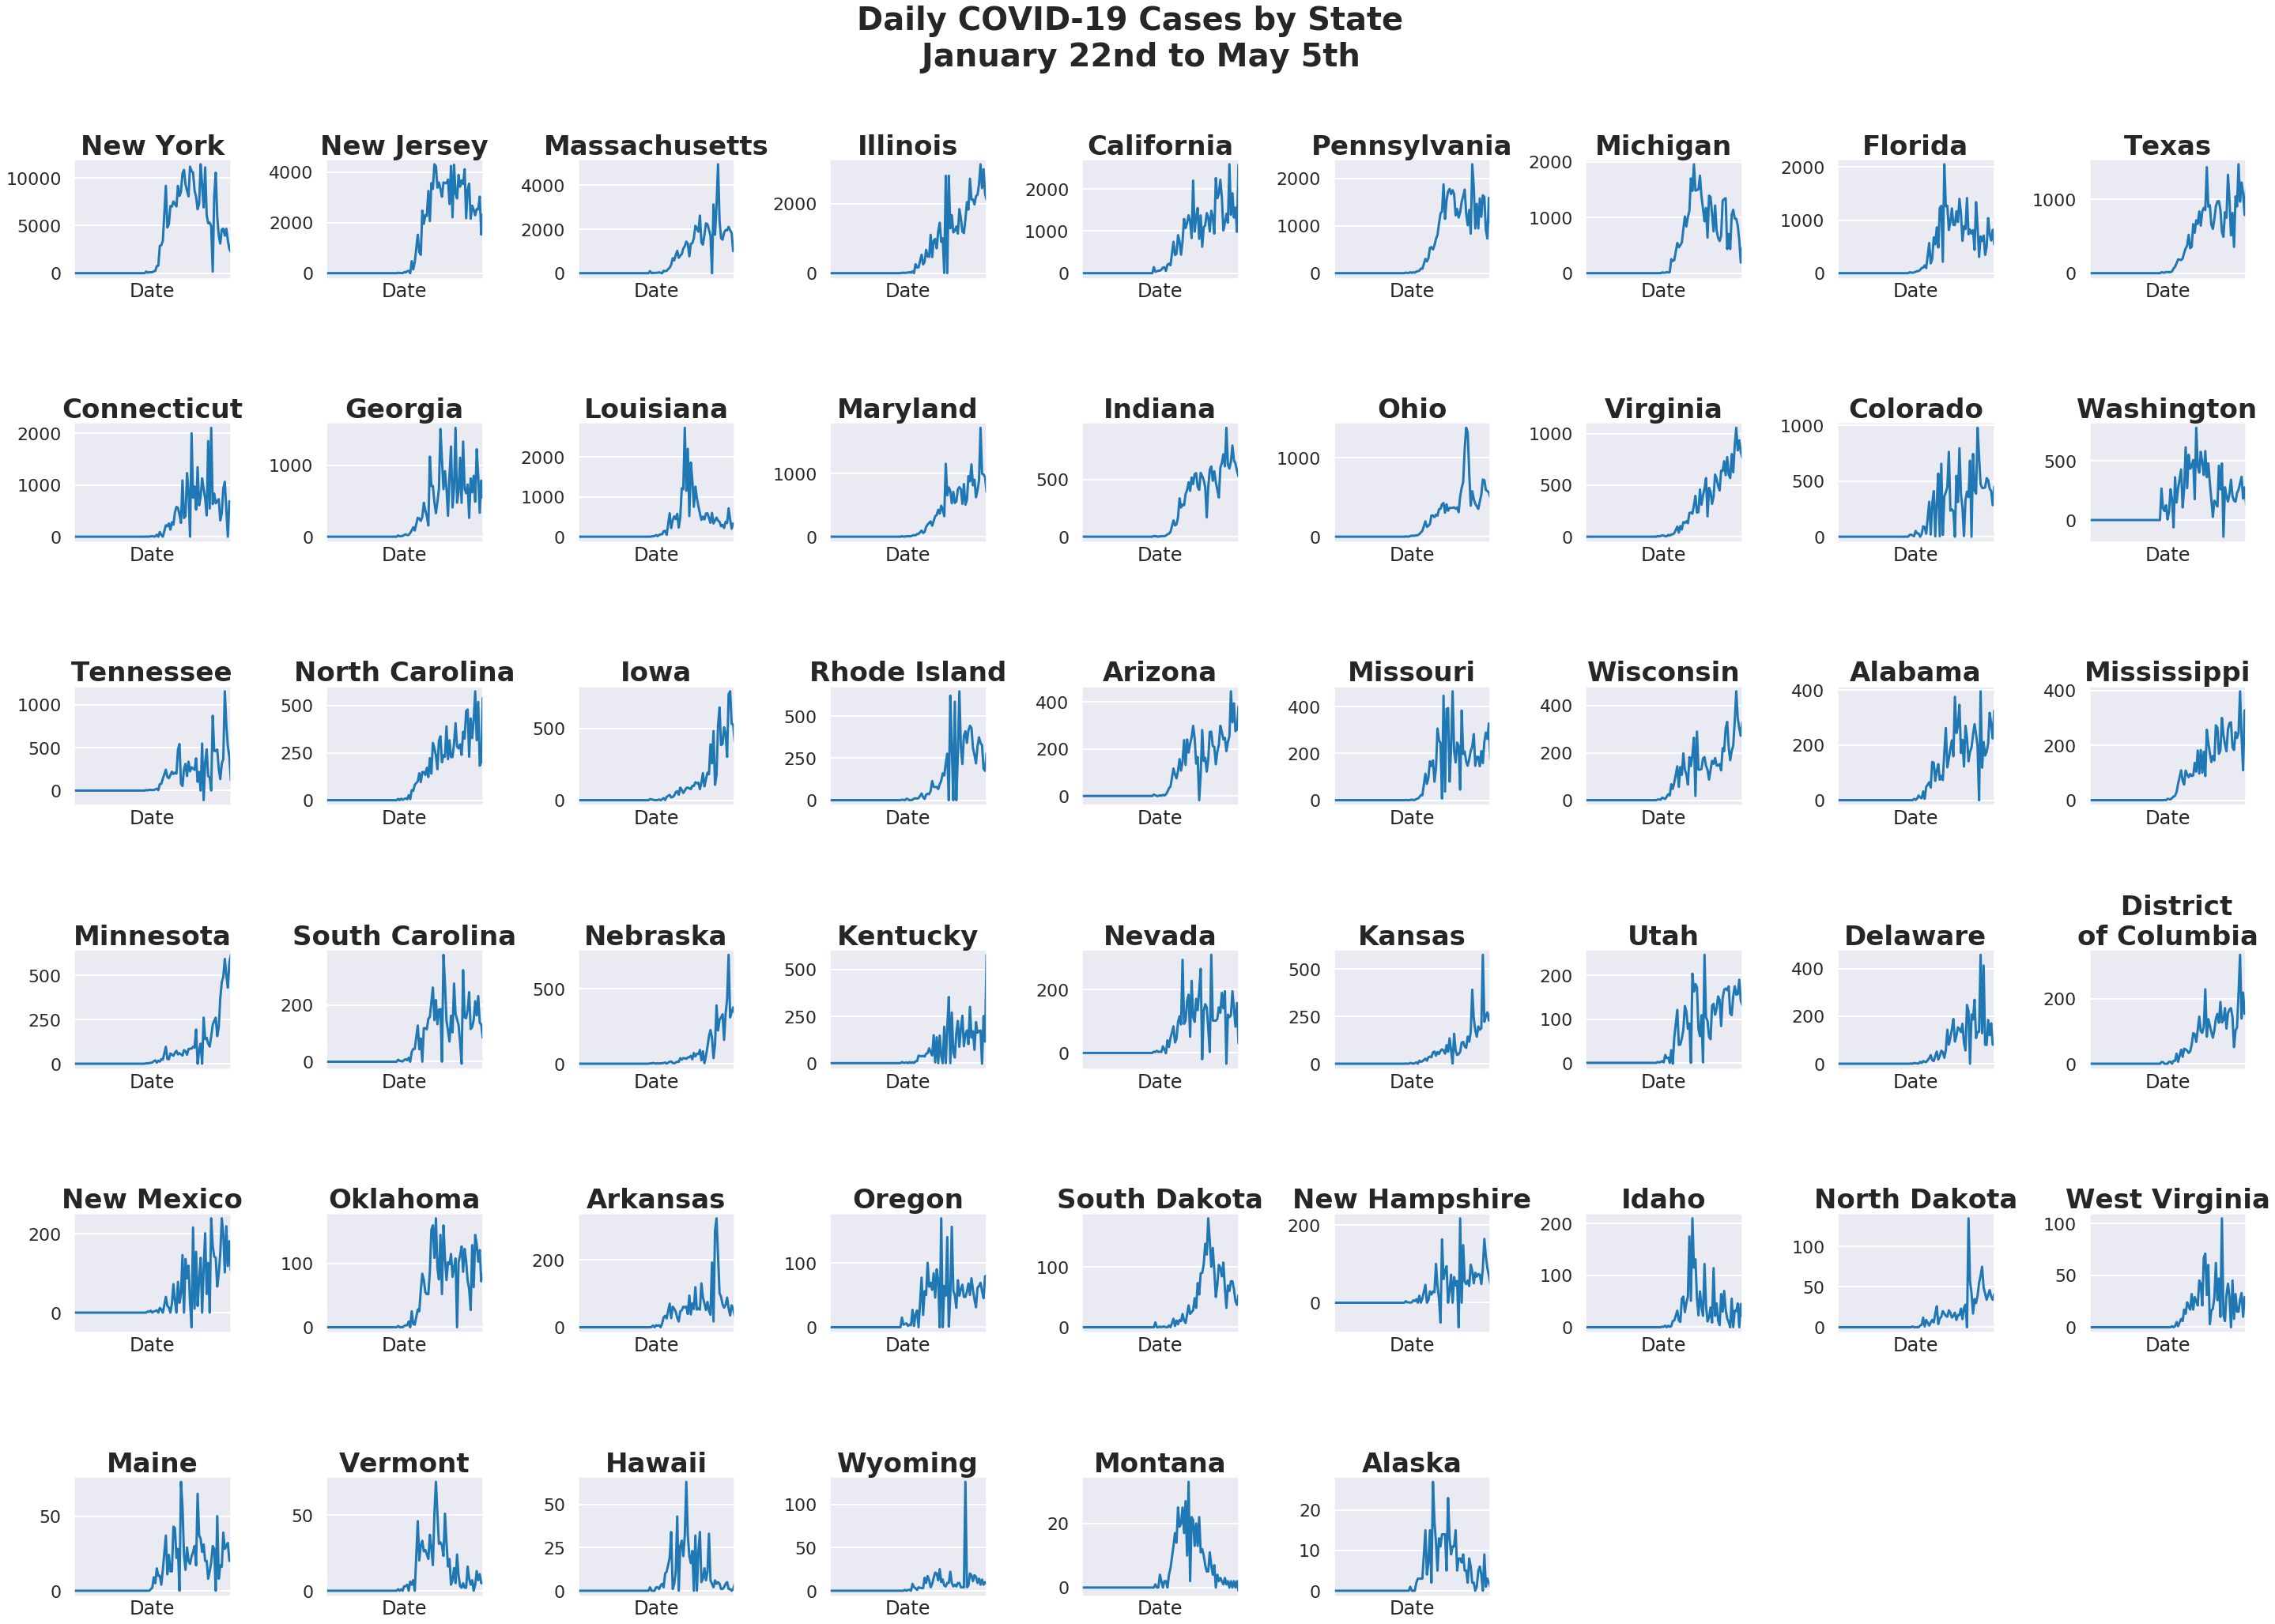

In [83]:
nrows = 6
ncols = 9
lastRow = nrows - 1
toRemove = nrows*ncols - len(states)
fig, axes = plt.subplots(nrows, ncols, figsize=(40,30))
for n, state in enumerate(states):
    i = n // ncols
    j = n % ncols
    ax = axes[i,j]
    if state == 'District of Columbia':
        ax.set_title('  District\nof Columbia', fontsize=34, weight='bold')
    else:
        ax.set_title(state, fontsize=34, weight='bold')
#     ax.set_axis_off()
#     ax.axis('off') #No axis
    #Y-axis only
    ax.set_xticks([])
#     ax.set_xticks([transformed.Date.min(), transformed.Date.max()])
#     myFmt = mdates.DateFormatter('%b')
#     ax.xaxis.set_major_formatter(myFmt)
#     ax.tick_params(axis='x', labelrotation=-45)
    temp = transformed[transformed['Province/State']==state]
    temp = temp.set_index('Date')
    temp['NewCases'].plot(ax=ax)
for i in range(ncols-toRemove,ncols):
    fig.delaxes(axes[lastRow,i])
fig.suptitle("Daily COVID-19 Cases by State \n January 22nd to May 5th", fontsize=40, y=.95, weight='bold');
plt.tight_layout();
plt.subplots_adjust(top=0.86, hspace = 1.2)
plt.savefig('StateDailyCasesWithYaxis.png', facecolor='white')
plt.show()

In [53]:
transformed[transformed['Province/State'].isin(states)]['NewCases'].max()

11434.0

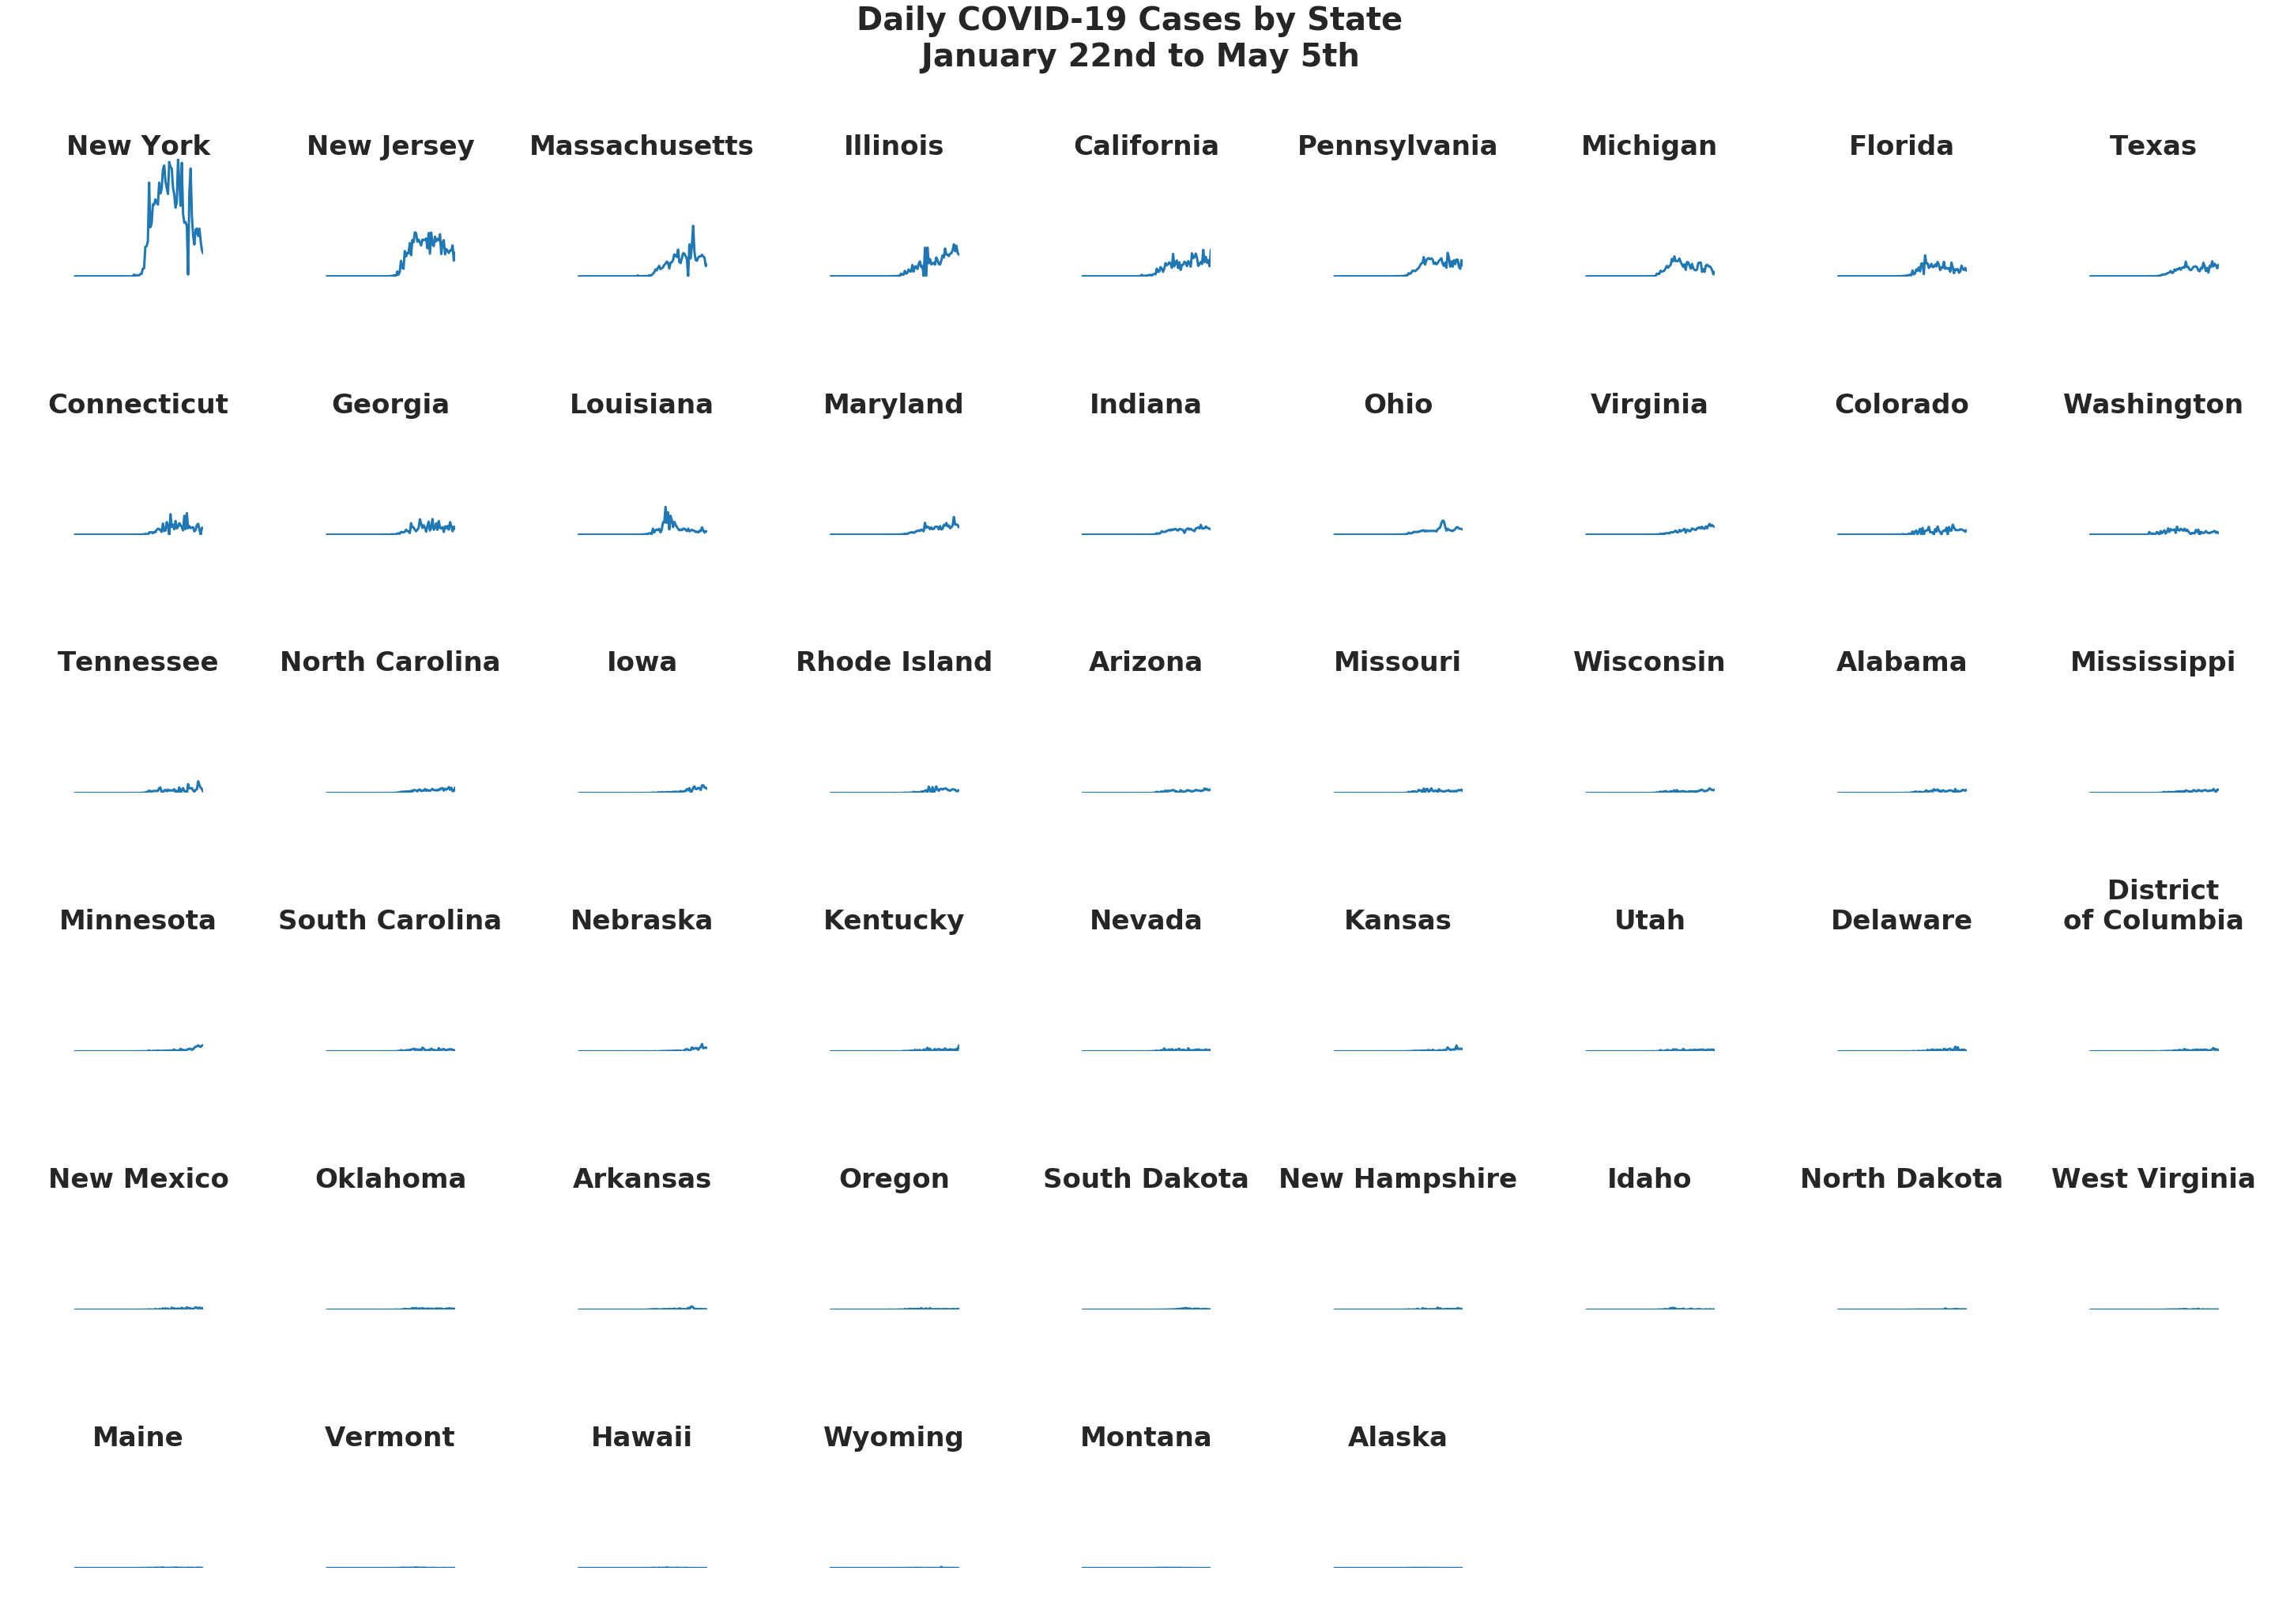

In [56]:
nrows = 6
ncols = 9
lastRow = nrows - 1
toRemove = nrows*ncols - len(states)
fig, axes = plt.subplots(nrows, ncols, figsize=(40,30))
for n, state in enumerate(states):
    i = n // ncols
    j = n % ncols
    ax = axes[i,j]
    if state == 'District of Columbia':
        ax.set_title('  District\nof Columbia', fontsize=34, weight='bold')
    else:
        ax.set_title(state, fontsize=34, weight='bold')
    ax.set_ylim([0, 11500])
    ax.set_axis_off()
    temp = transformed[transformed['Province/State']==state]
    temp = temp.set_index('Date')
    temp['NewCases'].plot(ax=ax)
for i in range(ncols-toRemove,ncols):
    fig.delaxes(axes[lastRow,i])
fig.suptitle("Daily COVID-19 Cases by State \n January 22nd to May 5th", fontsize=40, y=.95, weight='bold');
plt.tight_layout();
plt.subplots_adjust(top=0.86, hspace = 1.2)
plt.savefig('StateDailyCasesSetScale.png', facecolor='white')
plt.show()

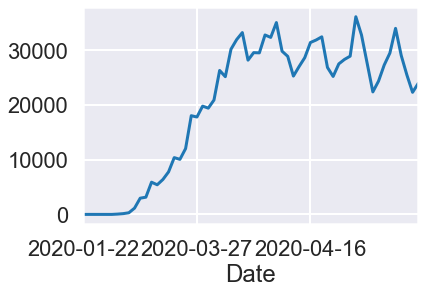

In [23]:
transformed[transformed['Country/Region']=='US'].groupby('Date')['NewCases'].sum().plot()

In [17]:
transformed[transformed['Province/State']=='French Polynesia']

,Province/State,Country/Region,Lat,Long,ConfirmedCases,Date,NewCases
405,French Polynesia,France,-17.6797,149.4068,0,2020-01-22,NaN
906,French Polynesia,France,-17.6797,149.4068,0,2020-01-26,0.0
1407,French Polynesia,France,-17.6797,149.4068,0,2020-02-02,0.0
1908,French Polynesia,France,-17.6797,149.4068,0,2020-02-09,0.0
2409,French Polynesia,France,-17.6797,149.4068,0,2020-02-16,0.0
2910,French Polynesia,France,-17.6797,149.4068,0,2020-02-23,0.0
3411,French Polynesia,France,-17.6797,149.4068,0,2020-03-01,0.0
3912,French Polynesia,France,-17.6797,149.4068,0,2020-03-05,0.0
4413,French Polynesia,France,-17.6797,149.4068,0,2020-03-08,0.0
4914,French Polynesia,France,-17.6797,149.4068,0,2020-03-12,0.0


## Save to File <a id="save">
    
[Table of Contents](#toc)

In [40]:
timedelta

TypeError: 'member_descriptor' object is not callable

In [42]:
yesterday = datetime.now()-timedelta(1)


'Apr05'

In [44]:
dir_ = '/home/matt/Documents/Projects/WebDev/mmitchell_net/FlaskApp/static/data/'
yesterday = datetime.now()-timedelta(1)
filename = 'Confirmed_Cases_through_{}.csv'.format(yesterday.strftime('%b%d'))
# print(filename)
transformed.to_csv(dir_+filename, index=False)